In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download tmdb/tmdb-movie-metadata

 90% 8.00M/8.89M [00:00<00:00, 83.8MB/s]
100% 8.89M/8.89M [00:00<00:00, 81.3MB/s]


In [10]:
! unzip tmdb-movie-metadata.zip

Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [11]:
import pandas as pd
credits = pd.read_csv('/content/tmdb_5000_credits.csv')
movies = pd.read_csv('/content/tmdb_5000_movies.csv')
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [13]:
movies_modified = movies[['original_title','vote_average','vote_count']]
movies_modified.head()

,original_title,vote_average,vote_count
0,Avatar,7.2,11800
1,Pirates of the Caribbean: At World's End,6.9,4500
2,Spectre,6.3,4466
3,The Dark Knight Rises,7.6,9106
4,John Carter,6.1,2124


In [14]:
v=movies_modified['vote_count']
R=movies_modified['vote_average']
C=movies_modified['vote_average'].mean()
m=movies_modified['vote_count'].quantile(0.70)
movies_modified['Weighted'] = (R*v+C*m)/(v+m)
movies_modified.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,original_title,vote_average,vote_count,Weighted
0,Avatar,7.2,11800,7.148013
1,Pirates of the Caribbean: At World's End,6.9,4500,6.807627
2,Spectre,6.3,4466,6.276075
3,The Dark Knight Rises,7.6,9106,7.509565
4,John Carter,6.1,2124,6.098319


In [16]:
movies_sorted = movies_modified.sort_values('Weighted',ascending=False)
movies_sorted.head()

,original_title,vote_average,vote_count,Weighted
1881,The Shawshank Redemption,8.5,8205,8.340775
3337,The Godfather,8.4,5893,8.192887
662,Fight Club,8.3,9413,8.171648
3232,Pulp Fiction,8.3,8428,8.157615
65,The Dark Knight,8.2,12002,8.102674


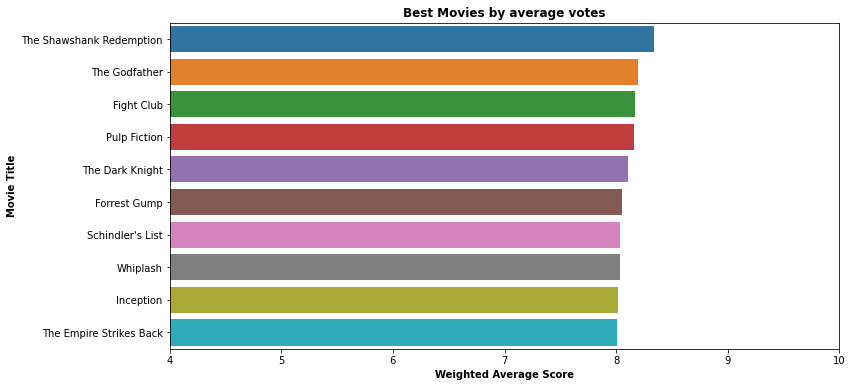

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
axis1=sns.barplot(x=movies_sorted['Weighted'].head(10), y=movies_sorted['original_title'].head(10), data=movies_sorted.Weighted)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

In [21]:
movies['popularity'].head()

0    150.437577
1    139.082615
2    107.376788
3    112.312950
4     43.926995
Name: popularity, dtype: float64

In [22]:
movies_modified['popularity'] = movies['popularity']
movies_modified

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,original_title,vote_average,vote_count,Weighted,popularity
0,Avatar,7.2,11800,7.148013,150.437577
1,Pirates of the Caribbean: At World's End,6.9,4500,6.807627,139.082615
2,Spectre,6.3,4466,6.276075,107.376788
3,The Dark Knight Rises,7.6,9106,7.509565,112.312950
4,John Carter,6.1,2124,6.098319,43.926995
...,...,...,...,...,...
4798,El Mariachi,6.6,238,6.239746,14.269792
4799,Newlyweds,5.9,5,6.090532,0.642552
4800,"Signed, Sealed, Delivered",7.0,6,6.101451,1.444476
4801,Shanghai Calling,5.7,7,6.087503,0.857008


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_modified[['Weighted','popularity']])
movie_scaled_df

array([[0.6743388 , 0.17181451],
       [0.5814027 , 0.15884603],
       [0.43627257, 0.12263486],
       ...,
       [0.38859469, 0.00164973],
       [0.38478644, 0.00097879],
       [0.38758191, 0.00220412]])

In [25]:
movies_modified['Weighted_scaled'] = movie_scaled_df[:,0]
movies_modified['popularity_scaled'] = movie_scaled_df[:,1]
movies_modified.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,original_title,vote_average,vote_count,Weighted,popularity,Weighted_scaled,popularity_scaled
0,Avatar,7.2,11800,7.148013,150.437577,0.674339,0.171815
1,Pirates of the Caribbean: At World's End,6.9,4500,6.807627,139.082615,0.581403,0.158846
2,Spectre,6.3,4466,6.276075,107.376788,0.436273,0.122635
3,The Dark Knight Rises,7.6,9106,7.509565,112.312950,0.773054,0.128272
4,John Carter,6.1,2124,6.098319,43.926995,0.387739,0.050169


In [26]:
movies_modified['Score'] = 0.5*movies_modified['Weighted_scaled'] + 0.5*movies_modified['popularity_scaled']
movies_modified.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,original_title,vote_average,vote_count,Weighted,popularity,Weighted_scaled,popularity_scaled,Score
0,Avatar,7.2,11800,7.148013,150.437577,0.674339,0.171815,0.423077
1,Pirates of the Caribbean: At World's End,6.9,4500,6.807627,139.082615,0.581403,0.158846,0.370124
2,Spectre,6.3,4466,6.276075,107.376788,0.436273,0.122635,0.279454
3,The Dark Knight Rises,7.6,9106,7.509565,112.312950,0.773054,0.128272,0.450663
4,John Carter,6.1,2124,6.098319,43.926995,0.387739,0.050169,0.218954


In [27]:
movies_scored_sorted = movies_modified.sort_values('Score',ascending=False)
movies_scored_sorted.head()

,original_title,vote_average,vote_count,Weighted,popularity,Weighted_scaled,popularity_scaled,Score
95,Interstellar,8.1,10867,7.998100,724.247784,0.906439,0.827162,0.866801
546,Minions,6.4,4571,6.365286,875.581305,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,7.9,9742,7.798252,481.098624,0.851874,0.549462,0.700668
788,Deadpool,7.4,10995,7.334360,514.569956,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,7.2,9427,7.135687,434.278564,0.670973,0.495989,0.583481


In [34]:
movies_scored_sorted['Score']

95      0.866801
546     0.730315
94      0.700668
788     0.656453
127     0.583481
          ...   
2122    0.054583
210     0.038391
3746    0.033437
242     0.030740
1652    0.012379
Name: Score, Length: 4803, dtype: float64

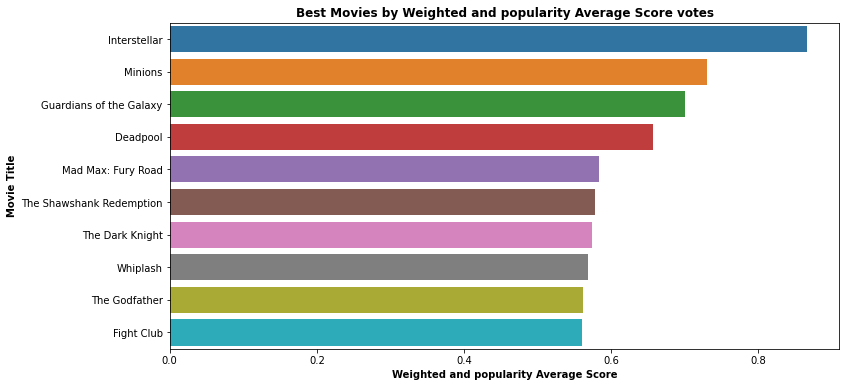

In [37]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=movies_scored_sorted['Score'].head(10), y=movies_scored_sorted['original_title'].head(10), data=movies_scored_sorted)
# plt.xlim(4, 10)
plt.title('Best Movies by Weighted and popularity Average Score votes', weight='bold')
plt.xlabel('Weighted and popularity Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies_Scored.png')